In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 12 03:12:20 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution with agent failure probability $p$

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
fail_probability = [0, 0.01, 0.02]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=0.0, U=6.470369944856402
k=1, rel_gap=inf, L=0.0, U=6.470369944856402
k=2, rel_gap=inf, L=0.0, U=3.700160976994014
k=3, rel_gap=inf, L=0.0, U=2.115332801834241
k=4, rel_gap=inf, L=0.0, U=1.209372474155953
k=5, rel_gap=inf, L=0.0, U=0.6917086633868161
k=6, rel_gap=inf, L=0.0, U=0.39554561742500993
k=7, rel_gap=inf, L=0.0, U=0.22650737369420093
k=8, rel_gap=inf, L=0.0, U=0.12965454583221278
k=9, rel_gap=inf, L=0.0, U=0.0739413519804193
k=10, rel_gap=inf, L=0.0, U=0.042400770162579496
k=11, rel_gap=inf, L=0.0, U=0.02415486082216241
k=12, rel_gap=inf, L=0.0, U=0.013756757915373594
k=13, rel_gap=inf, L=0.0, U=0.007798868537112086
k=14, rel_gap=inf, L=0.0, U=0.004411528322951973
k=15, rel_gap=inf, L=0.0, U=0.002492436914982585
k=16, rel_gap=inf, L=0.0, U=0.0014071203722274136
k=17, rel_gap=inf, L=0.0, U=0.0007935717949215763
k=18, rel_gap=inf, L=0.0, U=0.00044690635421093
k=19, rel_gap=inf, L=0.0, U=0.0002516075850294529
k=20, rel_gap=inf, L=0.0, U=0.0001415543472640902
k

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=37, rel_gap=inf, L=0.0, U=8.685935030955195e-05
k=38, rel_gap=inf, L=0.0, U=4.840723642844654e-05
k=39, rel_gap=inf, L=0.0, U=2.726389163935109e-05
k=40, rel_gap=inf, L=0.0, U=1.5451971919077922e-05
k=41, rel_gap=inf, L=0.0, U=1.5451971919077922e-05
k=42, rel_gap=inf, L=0.0, U=1.0238361803638145e-05
k=43, rel_gap=inf, L=0.0, U=6.151760186674925e-06


# Centralized solution

In [5]:
h_cvx = ob.cvx_intersection_cvx_sets(params=params)[2]

# Plot

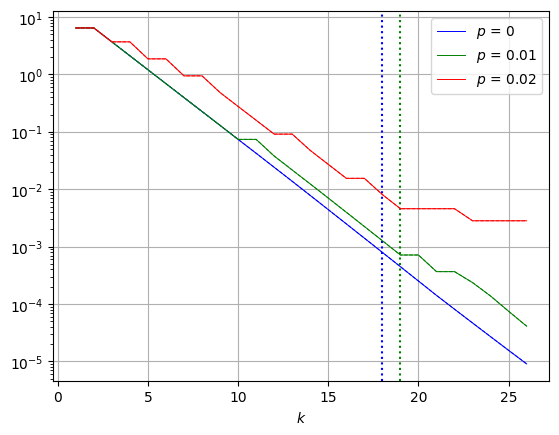

In [6]:
ob.plot_agent_failure_abs(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)